# Predicting the effectiveness of a Froth floating process


**Christian Schumacher, June 2019**


**Project Description:**

We will use this dataset to analyse and predict the Froth floating process having the two aims:
* What is the best predictor for the iron concentration of the product?
* Can the data set be used to predict the impurity of the product (by silicate concentration)?

**Data Description:** 

This notebook deals with the analysis of a reverse cationic flotation process of a real production environment. The data (including its documentation) is accessible through kaggle: https://www.kaggle.com/edumagalhaes/quality-prediction-in-a-mining-process

---

## The Froth flotation process

The froth floatation is used to seperate the iron contents in the ore from other contaminations. The whole process usually contains for steps:

1. Contioning of the ore feed pulp (mixture of ore and water) and other reagents
2. Separation of hydrophobic and hydrophilic materials: binding particles attach to the bubbles
3. The bubbles transport the particles upwards until they float on the surface (froth)
4. Collection of the froth by mechanical separation (e.g. by an impeller)

The following Figure visualizes this process:
![title](FlCirc.png)
Source: Wikimedia. https://commons.wikimedia.org/wiki/File:FlCirc.PNG#/media/File:FlCirc.PNG, last access: 30-Jun-19

The schematics of a froth floatation cell can be seen in the following figure.

The pulp is added to the cell and flows to the bottom where it is mixed with an air or nitrogen flow. Both are  swirled e.g. by an impeller to create bubbles to which the particles can bind. The bubbles then transport the particles upwards. By this process, the particles in the froth can be separated from the pulp.

![title](FlCell.png)
Source: Wikimedia. https://commons.wikimedia.org/wiki/File:FlCell.PNG#/media/File:FlCell.PNG, last access: 30-Jun-19

# Important equations

The following equations can help to evaluate the effectiveness of the process. 

**Ratio of feed weight to concentrate weight ($\frac{F}{C}$):**

$ \frac{F}{C}=\frac{c-t}{f-t}$

**Percent of metal recovered ($\mathrm{X}_{R}$) in wt%:**

$\mathrm{X}_{R}=100\left(\frac{c}{f}\right)\left(\frac{f-t}{c-t}\right)$

**Percent of metal lost ($\mathrm{X}_{L}$) in wt%:**

$\mathrm{X}_{L} = 100-\mathrm{X}_{R}$

**Percent of weight recovered ($\left(\mathrm{X}_{W}\right)$) in wt%:**

$\mathrm{X}_{W} = 100\left(\frac{C}{F}\right) = 100\frac{f-t}{c-t}$

where $F$ is the weight percent of feed, $C$ is the weight percent concentrate, $T$ is the weight percent of tailings and $c$, $t$, and $f$ are the metallurgical assays of the concentrate, tailings, and feed, respectively.

Equations were taken from:

Wikipedia. https://en.wikipedia.org/wiki/Froth_flotation, last access 30-Jun-2019

---

## Data Analysis

We start our analysis by importing required libraries:

In [127]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

pd.set_option('display.max_columns', None) # display all columns

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from IPython.display import display
from sklearn import metrics
from treeinterpreter import treeinterpreter as ti

# include fasti.ai libraries
from fastai.tabular import *

Loading the data:

In [128]:
PATH = 'MiningProcess_Flotation_Plant_Database.csv'
df = pd.read_csv(PATH, parse_dates = True, index_col = 'date',decimal=',')

Check if we have missing (nan) values:

In [129]:
shape1 = df.shape
df = df.dropna()
shape2 = df.shape
if shape1 == shape2:
    print('Data contains no nan values.')
else:
    print('Data contains nan values.')

Data contains no nan values.


Good. Let's look at the first couple of rows in our dataframe:

In [130]:
df.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,295.096,306.4,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,295.096,306.4,250.137,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,295.096,306.4,251.345,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,295.096,306.4,250.422,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,295.096,306.4,249.983,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


The dataframe contains data about:
* Quality measures of the iron ore pulp before feeding it into the process (inputs)
* Features that can effect the quality of the product (process parameters)
* Quality measures of the iron ore pulp as product of the process (outputs)

Let's check what our data types of each column and what the descriptive stats look like:

In [131]:
df.dtypes

% Iron Feed                     float64
% Silica Feed                   float64
Starch Flow                     float64
Amina Flow                      float64
Ore Pulp Flow                   float64
Ore Pulp pH                     float64
Ore Pulp Density                float64
Flotation Column 01 Air Flow    float64
Flotation Column 02 Air Flow    float64
Flotation Column 03 Air Flow    float64
Flotation Column 04 Air Flow    float64
Flotation Column 05 Air Flow    float64
Flotation Column 06 Air Flow    float64
Flotation Column 07 Air Flow    float64
Flotation Column 01 Level       float64
Flotation Column 02 Level       float64
Flotation Column 03 Level       float64
Flotation Column 04 Level       float64
Flotation Column 05 Level       float64
Flotation Column 06 Level       float64
Flotation Column 07 Level       float64
% Iron Concentrate              float64
% Silica Concentrate            float64
dtype: object

OK, this looks good so far. Lets start with visualizing the data to see flaws in the data. We start by plotting our dependent variable '% Silica Concentrate':

Text(0.5, 1.0, 'Silica Concentrate in %')

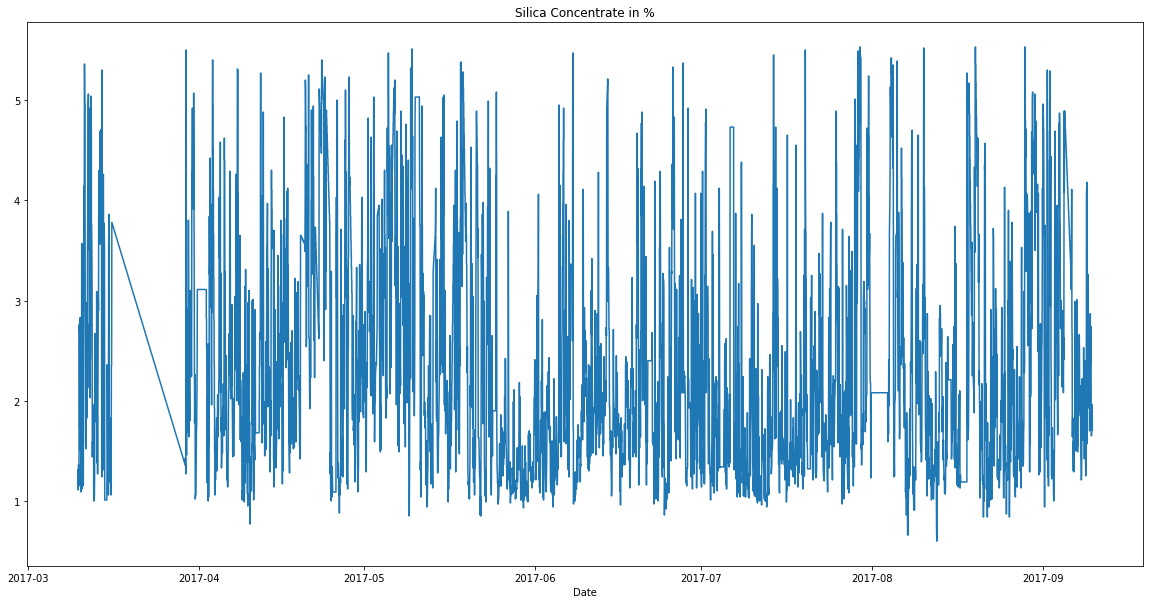

In [133]:
plt.figure(figsize=(20,10))
plt.plot(df['% Silica Concentrate']);
plt.xlabel('Date')
plt.title('Silica Concentrate in %')

We can see that our data misses data packages of a couple of days. Based on the documentation at Kaggle, this was caused by a production shutdown. In order to rule out any influences from potentially corrupted data, we will remove the data earlier of the restart of production ("2017-03-29 12:00:00").

We can also see that the quality of the products does not seem to follow a clear temporal dependency.

In [134]:
sep_date = "2017-03-29 12:00:00"
ind_date = df.index<sep_date #boolean of earlier dates
df.drop(df.index[ind_date],inplace=True)
df.head(1)

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,,,
2017-03-29 12:00:00,60.18,9.34,2044.99,349.911,405.625,9.74604,1.64965,200.393,195.734,201.826,295.096,306.4,250.601,251.002,555.264467,552.255566,614.984714,428.43,413.662,447.887,464.869,66.44,1.36


Now, we quickly look at pearson correlations between our features (independent variables) to get a better understanding of our dataset:

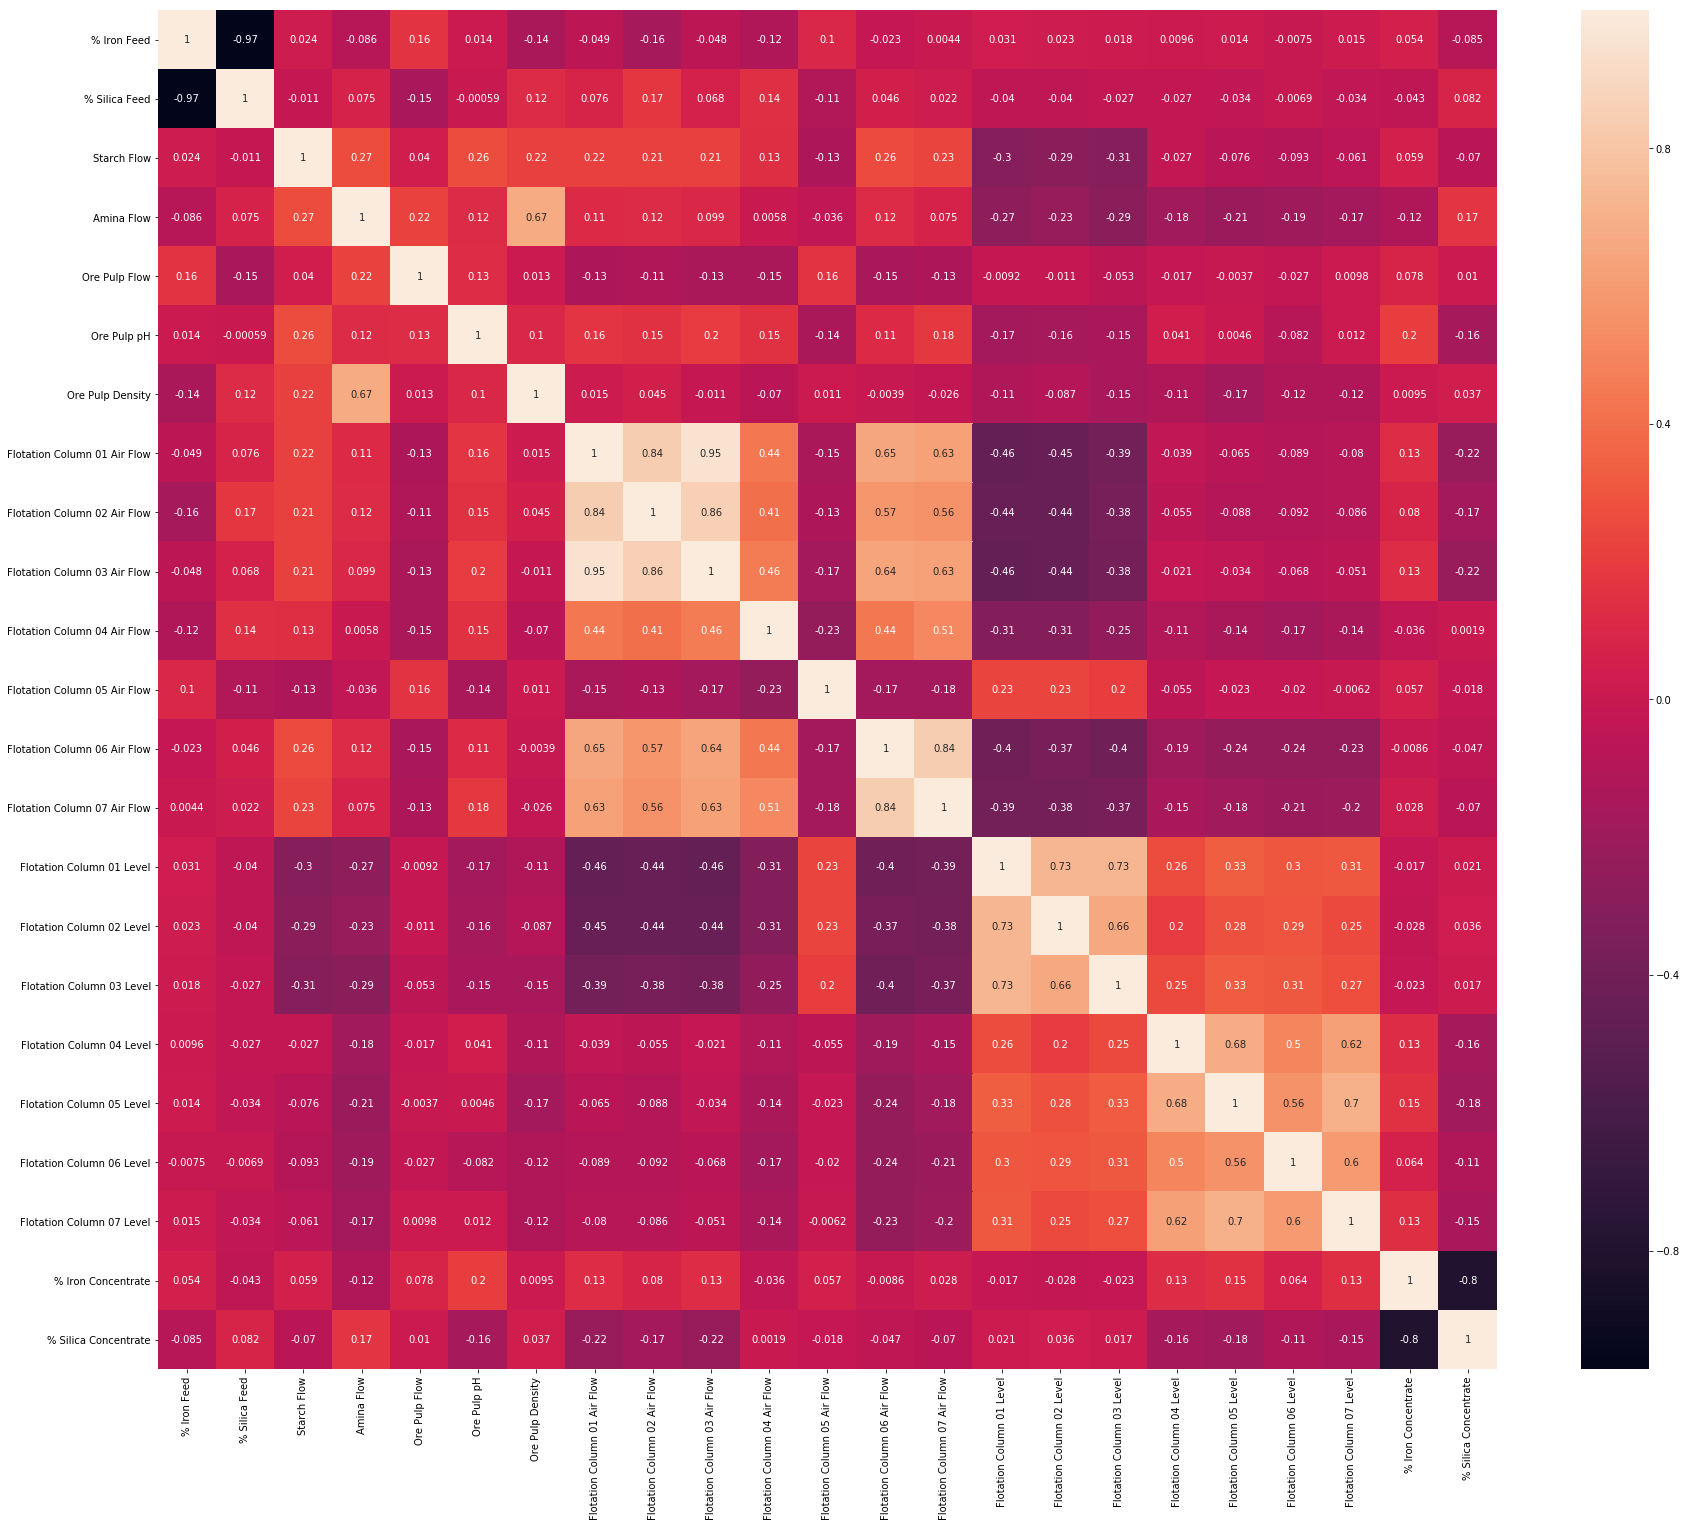

In [135]:
plt.figure(figsize=(30, 25))
p = sns.heatmap(df.corr(), annot=True)

That revealed a high (negative) correlations between the 'Iron Feed' and 'Silica Feed' (both Inputs of the process) as well as 'Iron Concentrate' and 'Silica Concentrate' (both Outputs of the process from the lab measurement). The later basically says, the higher the quality of the Iron, the smaller the less Silica it contains.

However, keep in mind that correlations dont give causalities.

## Modeling

Now let's apply a model to check if we can predict the dependent variable '% Concentrate Silica'. First, we split our dataframe into train and validation set (train: first 80% of dataframe, test: last 20% of dataframe). Then we need to remove our '% Silica Concentrate' and '% Iron Concentrate' columns, since the first one is the dependent variable and the later is not available for the online implementation, as these values come from a lab measurement and takes roughly 1h 40 minutes.

In [138]:
train, test = train_test_split(df, test_size=0.2)
x = train.drop(['% Silica Concentrate','% Iron Concentrate'], axis=1)
y = train['% Silica Concentrate']

**Train Random Forest**

In [140]:
model = RandomForestRegressor(n_estimators=50, min_samples_leaf=1, max_features=None, n_jobs=-1)
model.fit(x,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

**Check Train Set**

In [141]:
y_hat = model.predict(x)
mse = metrics.mean_squared_error(y,y_hat)
print('Train Set')
print('RMSE:',math.sqrt(mse),'   R2:',model.score(x,y))

Train Set
RMSE: 0.08286926402341055    R2: 0.9945314420690439


**Check Test Set**

In [142]:
x_test = test.drop(['% Silica Concentrate','% Iron Concentrate'], axis=1)
y_test = test['% Silica Concentrate']
y_hat_test = model.predict(x_test)
mse_test = metrics.mean_squared_error(y_test,y_hat_test)
print('TEST Set')
print('RMSE:',math.sqrt(mse_test),'   R2:',model.score(x_test,y_test))

TEST Set
RMSE: 0.2089428087297784    R2: 0.9653261101736609


OK, this looks pretty good. Let's have a try to interpret the model to draw some conclusions on the process

## Model interpretation

**Feature importance**

Let's look at the importance of each feature and plot the 10 most important features:

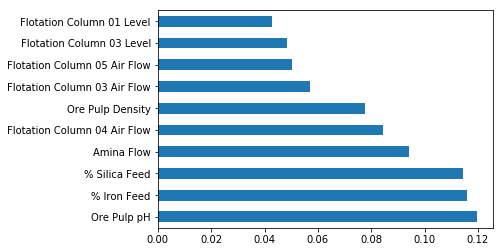

In [145]:
feat_importances = pd.Series(model.feature_importances_, index=df.columns[:-2])
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

We can see that even from the ten most important features, nine seem to have significantly smaller importance.

**Identifiying redundant features**

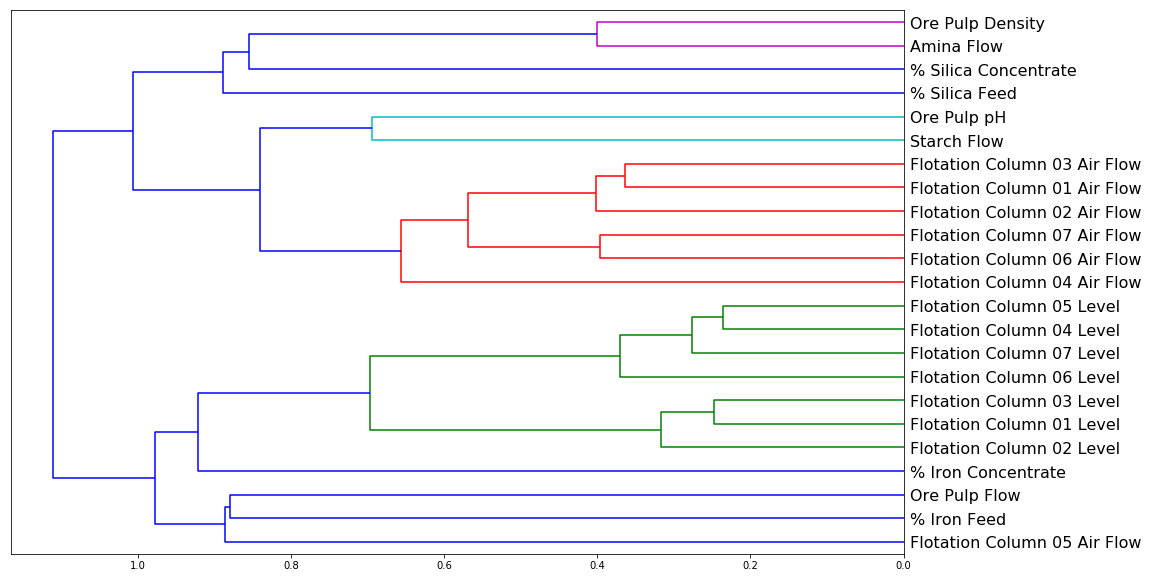

In [146]:
from scipy.cluster import hierarchy as hc
corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df.columns, orientation='left', leaf_font_size=16)
plt.show()

The plot above shows how each feature correlates with the others. The features which merge on the right hand side are closer to each other, suggesting that potentially only one of both would be sufficient for training the model. In order to reduce the collinearity of our data set, we can try to check if removing all other features will improve our model.

**Tree interpreter**

Interpreting results from one particular tree can be of interest to better understand, why for example one particular setting of features did result in a certain product (specific inputs and process parameter lead to a particular product quality).

In [148]:
row = x.values[None,0]; row
prediction, bias, contributions = ti.predict(model, row)
idxs = np.argsort(contributions[0])
[o for o in zip(x.columns[idxs], x.iloc[0][idxs], contributions[0][idxs])]

[('Ore Pulp pH', 9.901689999999999, -0.1862112683154383),
 ('Flotation Column 03 Air Flow', 298.543, -0.16503367607896646),
 ('Flotation Column 05 Level', 484.68800000000005, -0.03697187292811627),
 ('Flotation Column 01 Air Flow', 301.54200000000003, -0.02799251518372322),
 ('Ore Pulp Density', 1.6917900000000001, -0.027584581103047724),
 ('Flotation Column 04 Level', 546.158, -0.022313826879292523),
 ('Flotation Column 04 Air Flow', 300.248, -0.020140415278920437),
 ('Flotation Column 05 Air Flow', 301.066, -0.020040084363391993),
 ('Flotation Column 07 Air Flow', 283.259, -0.00016674715818572493),
 ('Flotation Column 02 Air Flow', 300.371, -5.727505087619988e-05),
 ('Flotation Column 06 Air Flow', 295.91900000000004, 4.417210771725522e-05),
 ('Flotation Column 03 Level', 415.47900000000004, 0.002137865863959858),
 ('Flotation Column 02 Level', 509.398, 0.002507326539052075),
 ('Flotation Column 06 Level', 492.673, 0.025448180978056387),
 ('Starch Flow', 3657.06, 0.04215233519099236)